# Sentiment Analysis Project with Zero-Shot Classification

Welcome to my Sentiment Analysis project utilizing Zero-Shot Classification with the BART model. This notebook is dedicated to building a sophisticated approach to identify and classify the sentiment of public comments without explicit training data for each category. Zero-shot classification enables the model to understand sentiment context through transfer learning and natural language understanding, making it highly versatile and powerful for analyzing texts from diverse sources.

## Objective:
The main objective of this project is to leverage the BART model for zero-shot sentiment analysis, enabling the accurate categorization of sentiments in public comments. This method is particularly valuable as it does not require a labeled dataset for every sentiment category, which can be resource-intensive to obtain. By applying this technique, I aim to gain insightful and actionable understandings from public opinions, enhancing decision-making processes in various domains.

## Dataset:
For this project, I will analyze a collection of public comments. These texts will vary in content and sentiment, providing a robust foundation for demonstrating the efficacy of zero-shot classification with BART. As the model requires no specific training on this dataset, we can directly apply it to classify sentiments as positive, negative, or neutral.

## Approach:
My approach to developing this sentiment analysis model includes the following steps:
1. **Data Collection**: Compile a diverse set of public comments for analysis.
2. **Model Selection**: Utilize the BART model, which is pre-trained on a large corpus of text and is adept at understanding and generating human-like text.
3. **Zero-Shot Classification**: Apply the zero-shot learning capabilities of the BART model to classify the sentiment of each comment without explicit sentiment labels.
4. **Analysis and Interpretation**: Evaluate the results to understand public sentiment on various topics or issues.
5. **Insights Application**: Use the gleaned insights to inform decision-making processes, policy formulation, or customer service enhancements.

## Tools and Libraries:
I will use Python as my programming language, supported by libraries such as Transformers by Hugging Face for accessing the BART model, pandas for data manipulation, and Matplotlib and Seaborn for data visualization. This combination of tools will enable efficient data handling and effective sentiment analysis.

Let's dive into the world of zero-shot sentiment analysis with BART and uncover the sentiments hidden within public comments!


In [1]:
import pandas as pd
# Define the path to the file and read the Excel file
file_path = r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\Sentiment-Analysis_NLP\Sentiment-Analysis_NLP\Data\Final_Data_Corrected_All.xlsx"
df_orig = pd.read_excel(file_path)

In [2]:
df_orig = df_orig.iloc[:,[0,1,2,3]]

In [3]:
df_orig.head()

,Project ID,Project Cost,Project Description,Comments
0,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM ...,GET IT DONE!
1,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM ...,Very excited about this project!
2,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM ...,Why isn't the Fall Line Trail all the way to P...
3,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM ...,Consider adding funds for branching feeder tra...
4,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM ...,Let's do this!


In [4]:
df = df_orig

In [5]:
import os 
os.getcwd()

'C:\\Users\\rsingh\\OneDrive - PlanRVA\\Documents\\2_Projects\\Extras\\Sentiment-Analysis_NLP\\Sentiment-Analysis_NLP\\Scripts'

In [6]:
import re
from transformers import pipeline

# List of common English stopwords
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the",
    "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against",
    "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only",
    "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "project", "virginia", "funding"
])

# Function to clean and split text into words
def clean_and_split(text):
    # Remove punctuation and numbers, convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Split text into words
    words = text.split()  # Split into words
    return ' '.join([word for word in words if word not in stopwords])  # Join filtered words back into a string

# Read themes from a readme file
with open("Themes_to_Model.txt", "r") as file:
    themes = file.read().splitlines()

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define the path to the file and read the Excel file
#file_path = r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\NLP_TextAnalysis\Latest_Model\Paste Your Input File Here\reviews_SERDI.xlsx"
#df = pd.read_excel(file_path)
# df = df[:100]  # Uncomment if you want to process a subset
df = df[['Comments']]  # Ensure df remains a DataFrame
df['Predicted Label'] = ""  # Add a new column for the predicted labels
df['Score'] = 0.0

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    try:
        # Get the review text and clean it
        original_text = row['Comments']
        text = clean_and_split(original_text)  # Clean and filter stopwords from the text

        # Check if 'text' is NaN
        if pd.isna(original_text):  # Check the original text for NaN
            df.at[index, 'Predicted Label'] = 'N/A'
            df.at[index, 'Score'] = 0
            print(f"Assigned 'N/A' label to empty review at index {index}.")
            continue

        # Perform zero-shot classification on the cleaned text
        results = classifier(text, themes)
        highest_scoring_theme = results['labels'][0]
        highest_score = results['scores'][0]
        df.at[index, 'Predicted Label'] = highest_scoring_theme
        df.at[index, 'Score'] = highest_score
    except Exception as e:
        print(f"Error processing review at index {index}: {e}")
        df.at[index, 'Predicted Label'] = "Classification Error"
        df.at[index, 'Score'] = 0

    print(f"Processed Sentence: {index + 1}/{len(df)}")

# Write the modified DataFrame back to a new Excel file
output_file_path = r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\Sentiment-Analysis_NLP\Sentiment-Analysis_NLP\Output\Sentiment_Out.xlsx"
df.to_excel(output_file_path, index=False)


C:\Users\rsingh\AppData\Local\Temp\ipykernel_44500\2223360056.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted Label'] = ""  # Add a new column for the predicted labels
C:\Users\rsingh\AppData\Local\Temp\ipykernel_44500\2223360056.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score'] = 0.0


Processed Sentence: 1/766
Processed Sentence: 2/766
Processed Sentence: 3/766
Processed Sentence: 4/766
Processed Sentence: 5/766
Processed Sentence: 6/766
Processed Sentence: 7/766
Processed Sentence: 8/766
Processed Sentence: 9/766
Processed Sentence: 10/766
Processed Sentence: 11/766
Processed Sentence: 12/766
Processed Sentence: 13/766
Processed Sentence: 14/766
Processed Sentence: 15/766
Processed Sentence: 16/766
Processed Sentence: 17/766
Processed Sentence: 18/766
Processed Sentence: 19/766
Processed Sentence: 20/766
Processed Sentence: 21/766
Processed Sentence: 22/766
Processed Sentence: 23/766
Processed Sentence: 24/766
Processed Sentence: 25/766
Processed Sentence: 26/766
Processed Sentence: 27/766
Processed Sentence: 28/766
Processed Sentence: 29/766
Processed Sentence: 30/766
Processed Sentence: 31/766
Processed Sentence: 32/766
Processed Sentence: 33/766
Processed Sentence: 34/766
Processed Sentence: 35/766
Processed Sentence: 36/766
Processed Sentence: 37/766
Processed 

Processed Sentence: 298/766
Processed Sentence: 299/766
Processed Sentence: 300/766
Processed Sentence: 301/766
Processed Sentence: 302/766
Processed Sentence: 303/766
Processed Sentence: 304/766
Processed Sentence: 305/766
Processed Sentence: 306/766
Processed Sentence: 307/766
Processed Sentence: 308/766
Processed Sentence: 309/766
Processed Sentence: 310/766
Processed Sentence: 311/766
Processed Sentence: 312/766
Processed Sentence: 313/766
Processed Sentence: 314/766
Processed Sentence: 315/766
Error processing review at index 315: You must include at least one label and at least one sequence.
Processed Sentence: 316/766
Processed Sentence: 317/766
Processed Sentence: 318/766
Processed Sentence: 319/766
Processed Sentence: 320/766
Processed Sentence: 321/766
Processed Sentence: 322/766
Processed Sentence: 323/766
Processed Sentence: 324/766
Processed Sentence: 325/766
Processed Sentence: 326/766
Processed Sentence: 327/766
Processed Sentence: 328/766
Processed Sentence: 329/766
Pro

Processed Sentence: 584/766
Processed Sentence: 585/766
Processed Sentence: 586/766
Processed Sentence: 587/766
Processed Sentence: 588/766
Processed Sentence: 589/766
Processed Sentence: 590/766
Processed Sentence: 591/766
Processed Sentence: 592/766
Processed Sentence: 593/766
Processed Sentence: 594/766
Error processing review at index 594: You must include at least one label and at least one sequence.
Processed Sentence: 595/766
Processed Sentence: 596/766
Processed Sentence: 597/766
Processed Sentence: 598/766
Processed Sentence: 599/766
Processed Sentence: 600/766
Processed Sentence: 601/766
Processed Sentence: 602/766
Processed Sentence: 603/766
Processed Sentence: 604/766
Processed Sentence: 605/766
Processed Sentence: 606/766
Processed Sentence: 607/766
Processed Sentence: 608/766
Processed Sentence: 609/766
Processed Sentence: 610/766
Processed Sentence: 611/766
Processed Sentence: 612/766
Processed Sentence: 613/766
Processed Sentence: 614/766
Processed Sentence: 615/766
Pro

In [7]:
df.head(30)

,Comments,Predicted Label,Score
0,GET IT DONE!,Support but Skeptical,0.585024
1,Very excited about this project!,Full Support,0.703242
2,Why isn't the Fall Line Trail all the way to P...,Support but Skeptical,0.826517
3,Consider adding funds for branching feeder tra...,Support but Skeptical,0.751945
4,Let's do this!,Full Support,0.519945
5,The idea of a multi use trail from Ashland to ...,Support but Skeptical,0.565559
6,Fund the Fall Line Trail! This will be an awe...,Full Support,0.595767
7,Building this section of the trail would not o...,Support but Skeptical,0.720340
8,This project will be so beneficial in connecti...,Full Support,0.805021
9,Extremely useful addition to the bike/ped netw...,Full Support,0.662852


In [8]:
import pandas as pd

# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # No restricted display width
pd.set_option('display.max_colwidth', None)  # Show full content of each column

In [9]:
result_df = pd.concat([df_orig.iloc[:, [0, 1, 2]], df], axis=1)

In [10]:
result_df.head(50)

,Project ID,Project Cost,Project Description,Comments,Predicted Label,Score
0,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),GET IT DONE!,Support but Skeptical,0.585024
1,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),Very excited about this project!,Full Support,0.703242
2,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),Why isn't the Fall Line Trail all the way to Petersburg? The bridge over the Appomattox River connecting VSU and the trail to Petersburg is critical.,Support but Skeptical,0.826517
3,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),Consider adding funds for branching feeder trails to parks and schools.,Support but Skeptical,0.751945
4,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),Let's do this!,Full Support,0.519945
5,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),The idea of a multi use trail from Ashland to Petersburg would be a great addition to the region. The capital trail has been highly successful and having another long distance trail will continue to bring folks to the area and use it.,Support but Skeptical,0.565559
6,AT-13,5722345.0,Richmond Fall Line Trail: Segment 4C - MM 21.8 to MM 23.9,"Fund the Fall Line Trail! This will be an awesome addition to our community!! It will attract tourists and benefit residents, too.",Full Support,0.595767
7,AT-13,5722345.0,Richmond Fall Line Trail: Segment 4C - MM 21.8 to MM 23.9,"Building this section of the trail would not only provide safer recreational opportunities, it would also provide a safer commute for the many people I see biking on/near Commerce despite the heavy truck traffic.",Support but Skeptical,0.720340
8,AT-13,5722345.0,Richmond Fall Line Trail: Segment 4C - MM 21.8 to MM 23.9,This project will be so beneficial in connecting the Oak Grove-Bellmeade community to resources and recreation. I look forward to riding this from Northside to Bellemeade Park with my family.,Full Support,0.805021
9,AT-14,601708.0,Richmond Fall Line Trail: Segment 4D - MM 23.9 to MM,Extremely useful addition to the bike/ped network.,Full Support,0.662852


In [11]:
# Write the modified DataFrame back to a new Excel file
output_file_path = r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\Sentiment-Analysis_NLP\Sentiment-Analysis_NLP\Output\Sentiment_Out_Final.xlsx"
result_df.to_excel(output_file_path, index=False)

In [12]:
result_df['Score'].mean()

0.7750862663315108

In [13]:
result_df

,Project ID,Project Cost,Project Description,Comments,Predicted Label,Score
0,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),GET IT DONE!,Support but Skeptical,0.585024
1,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),Very excited about this project!,Full Support,0.703242
2,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),Why isn't the Fall Line Trail all the way to Petersburg? The bridge over the Appomattox River connecting VSU and the trail to Petersburg is critical.,Support but Skeptical,0.826517
3,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),Consider adding funds for branching feeder trails to parks and schools.,Support but Skeptical,0.751945
4,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),Let's do this!,Full Support,0.519945
5,AT-1,632347.0,Chesterfield Fall Line Trail: Segment 2B - MM 4.0 to MM 9.4 (Only Portion Within RRTPO),The idea of a multi use trail from Ashland to Petersburg would be a great addition to the region. The capital trail has been highly successful and having another long distance trail will continue to bring folks to the area and use it.,Support but Skeptical,0.565559
6,AT-13,5722345.0,Richmond Fall Line Trail: Segment 4C - MM 21.8 to MM 23.9,"Fund the Fall Line Trail! This will be an awesome addition to our community!! It will attract tourists and benefit residents, too.",Full Support,0.595767
7,AT-13,5722345.0,Richmond Fall Line Trail: Segment 4C - MM 21.8 to MM 23.9,"Building this section of the trail would not only provide safer recreational opportunities, it would also provide a safer commute for the many people I see biking on/near Commerce despite the heavy truck traffic.",Support but Skeptical,0.720340
8,AT-13,5722345.0,Richmond Fall Line Trail: Segment 4C - MM 21.8 to MM 23.9,This project will be so beneficial in connecting the Oak Grove-Bellmeade community to resources and recreation. I look forward to riding this from Northside to Bellemeade Park with my family.,Full Support,0.805021
9,AT-14,601708.0,Richmond Fall Line Trail: Segment 4D - MM 23.9 to MM,Extremely useful addition to the bike/ped network.,Full Support,0.662852


In [14]:
df[df['Predicted Label']=="Strictly Against"]

,Comments,Predicted Label,Score
89,Stop the widening of roads for cars. Continue in the trend with the Captial Trail. Invest in bike and pedestrian means of transportation. There is zero need to widen these roads.,Strictly Against,0.553683
98,"Widening for bikes & pedestrian accommodations is good, widening for capacity is a never- ending cycle, which I oppose.",Strictly Against,0.805731
102,Unnecessary! Don't widen this road for car transit! Stop the continuous need for development.,Strictly Against,0.692021
105,"Widening for bikes & pedestrian accommodations is good, widening for capacity is a never- ending cycle, which I oppose.",Strictly Against,0.805731
108,This is highly unnecessary and much too costly. 360 is already a three lane road. The traffic issues caused here will not be solved by using a disgusting amount of tax dollars to add a lane. Transit is far more important than lane additions.,Strictly Against,0.595748
113,This is unnecessary based on the amount of traffic on this part of route 60 and it is cost prohibitive.,Strictly Against,0.694278
122,"Widening for pedestrians accommodations is good, widening for capacity is a never-ending cycle, which I oppose.",Strictly Against,0.796275
148,I oppose this widening for accommodating car capacity. This needs to be widened to accommodate bike/ped road users.,Strictly Against,0.915209
149,I am opposed The county comprehensive plan does not allow dense residential development west of 288. There will not be significant population and traffic counts to justify this expenditure,Strictly Against,0.758954
150,This is unnecessary based on the traffic usage on this road and it is cost prohibitive.,Strictly Against,0.588989


In [8]:
df=result_df

In [ ]:
## Analysis and Visualizations

In [4]:
df=result_df

<Figure size 1400x800 with 0 Axes>

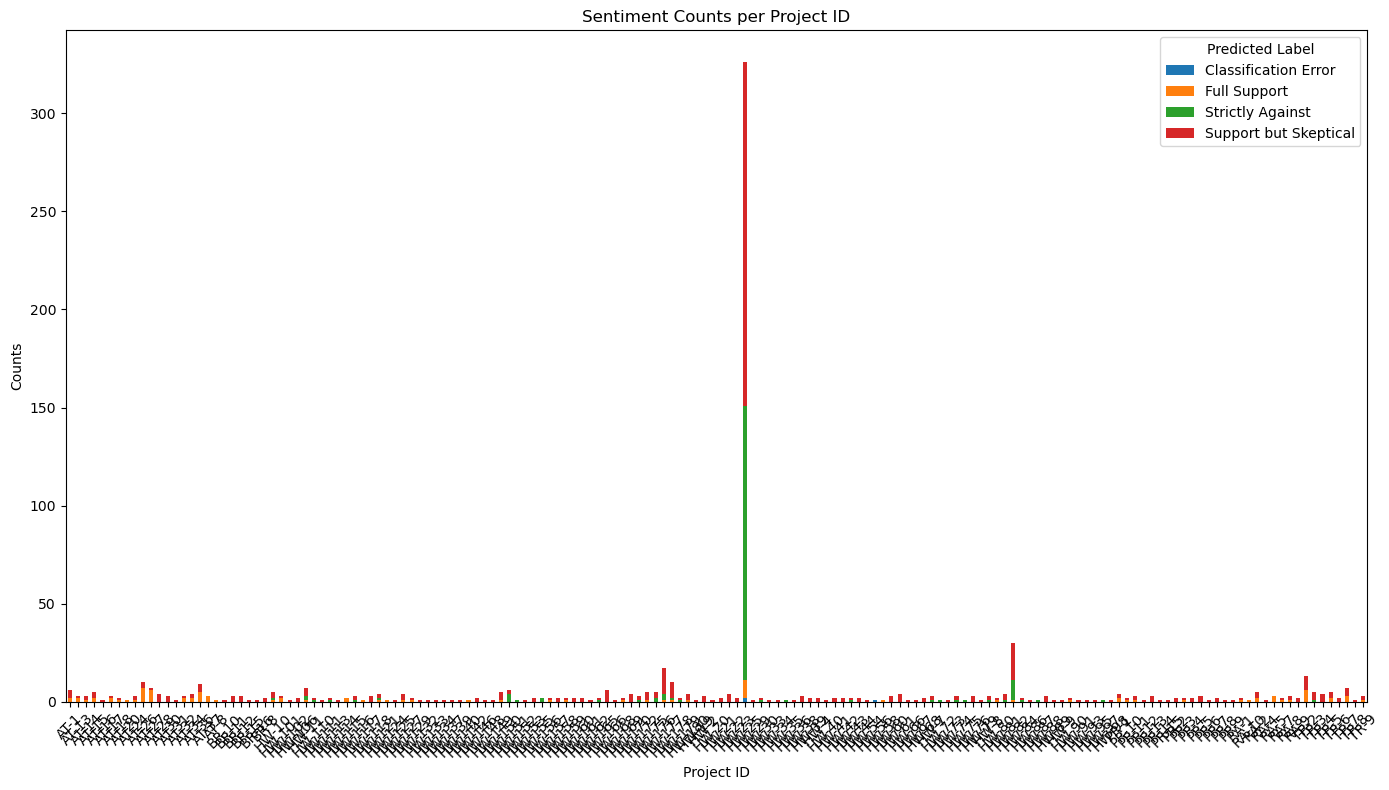

C:\Users\rsingh\AppData\Local\Temp\ipykernel_38984\3360669890.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Project ID', y='Project Cost', hue='Predicted Label', data=df, estimator=sum, ci=None)


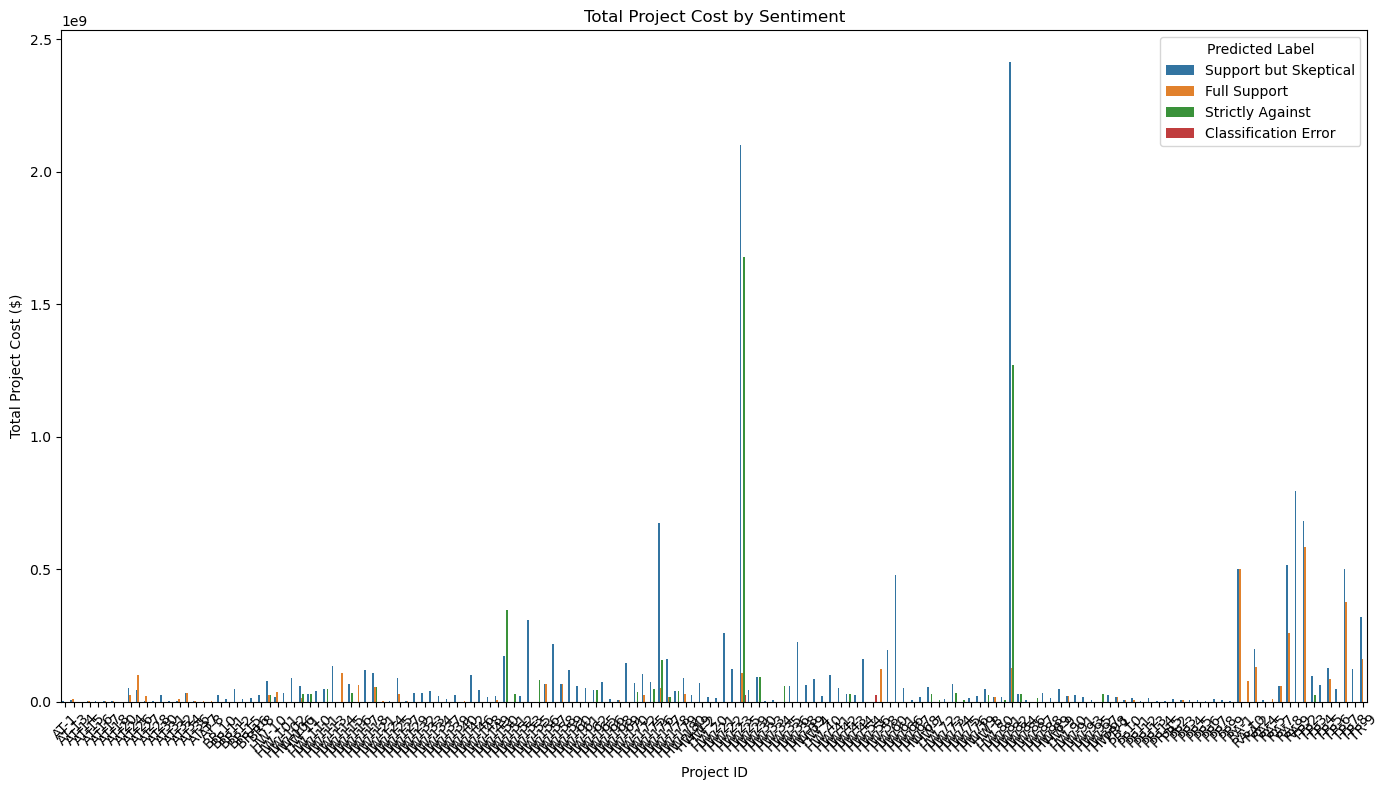

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 0. Remove any rows with NaNs
df.dropna(inplace=True)

# Convert 'Project Cost' into a numeric value for analysis, removing any non-numeric characters
#df['Project Cost'] = df['Project Cost'].replace('[\$,]', '', regex=True).astype(float)

# 1. Count of each sentiment per 'Project ID'
sentiment_counts = df.groupby(['Project ID', 'Predicted Label']).size().unstack(fill_value=0)
sentiment_counts.reset_index(inplace=True)

# 2. Visualization for support and opposition per 'Project ID'
plt.figure(figsize=(14, 8))
sentiment_counts.set_index('Project ID').plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Sentiment Counts per Project ID')
plt.ylabel('Counts')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.legend(title='Predicted Label')
plt.tight_layout()
plt.show()

# Analysis combining 'Project Cost' with sentiment
# Calculate average cost per sentiment category for each project
avg_cost_sentiment = df.groupby(['Project ID', 'Predicted Label'])['Project Cost'].mean().unstack(fill_value=0)
avg_cost_sentiment.reset_index(inplace=True)

# 3. Visualization integrating 'Project Cost' with the sentiment
plt.figure(figsize=(14, 8))
sns.barplot(x='Project ID', y='Project Cost', hue='Predicted Label', data=df, estimator=sum, ci=None)
plt.title('Total Project Cost by Sentiment')
plt.ylabel('Total Project Cost ($)')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.legend(title='Predicted Label')
plt.tight_layout()
plt.show()


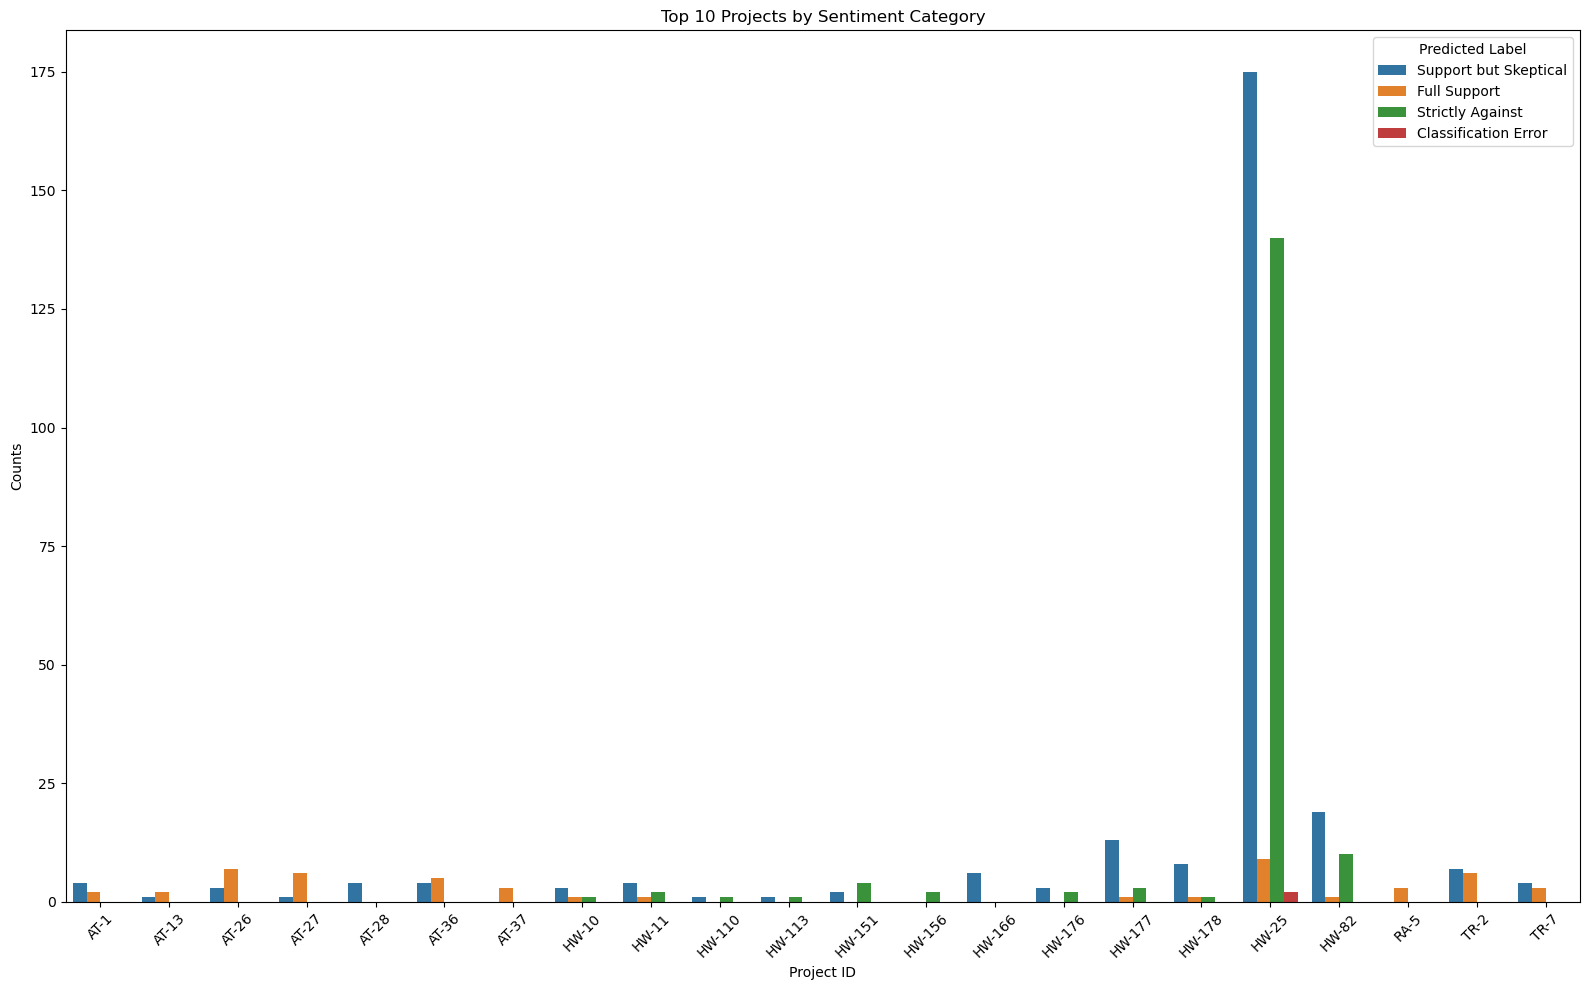

C:\Users\rsingh\AppData\Local\Temp\ipykernel_38984\4272642046.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_projects_df, x='Project ID', y='Project Cost', estimator=sum, ci=None, order=top_projects_indices)


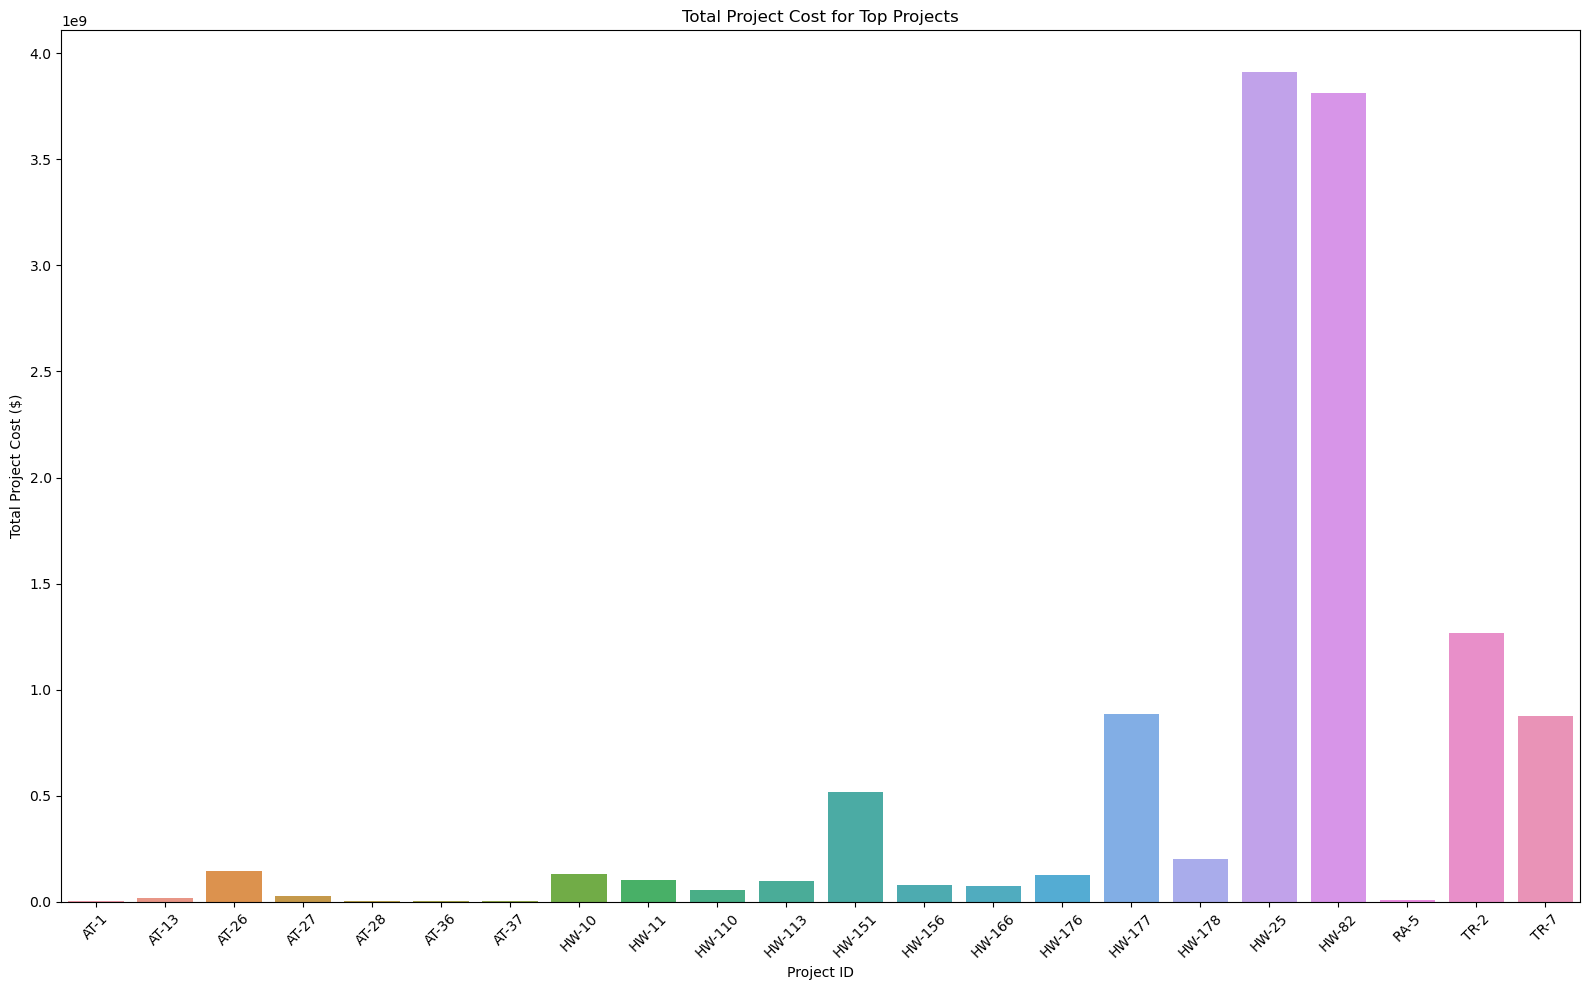

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure NaNs are removed and 'Project Cost' is correctly typed
df.dropna(inplace=True)
df['Project Cost'] = pd.to_numeric(df['Project Cost'], errors='coerce')  # Convert to numeric, set errors as NaN
df.dropna(subset=['Project Cost'], inplace=True)  # Remove rows where 'Project Cost' is NaN after conversion

# Aggregate sentiment counts per 'Project ID'
sentiment_counts = df.groupby(['Project ID', 'Predicted Label']).size().unstack(fill_value=0)
# Aggregate total cost per 'Project ID'
total_costs = df.groupby('Project ID')['Project Cost'].sum()

# Identify top 10 projects based on counts for each sentiment category
top_support = sentiment_counts['Full Support'].nlargest(10).index
top_skeptical = sentiment_counts['Support but Skeptical'].nlargest(10).index
top_against = sentiment_counts['Strictly Against'].nlargest(10).index

# Combine the indices of the top projects from each category for plotting
top_projects_indices = top_support.union(top_skeptical).union(top_against)

# Filter original DataFrame for these top projects
top_projects_df = df[df['Project ID'].isin(top_projects_indices)]

# Visualization for the top 10 projects per sentiment category
plt.figure(figsize=(16, 10))
sns.countplot(data=top_projects_df, x='Project ID', hue='Predicted Label', order=top_projects_indices)
plt.title('Top 10 Projects by Sentiment Category')
plt.ylabel('Counts')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.legend(title='Predicted Label')
plt.tight_layout()
plt.show()

# Visualization for the total project cost of top projects
plt.figure(figsize=(16, 10))
sns.barplot(data=top_projects_df, x='Project ID', y='Project Cost', estimator=sum, ci=None, order=top_projects_indices)
plt.title('Total Project Cost for Top Projects')
plt.ylabel('Total Project Cost ($)')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

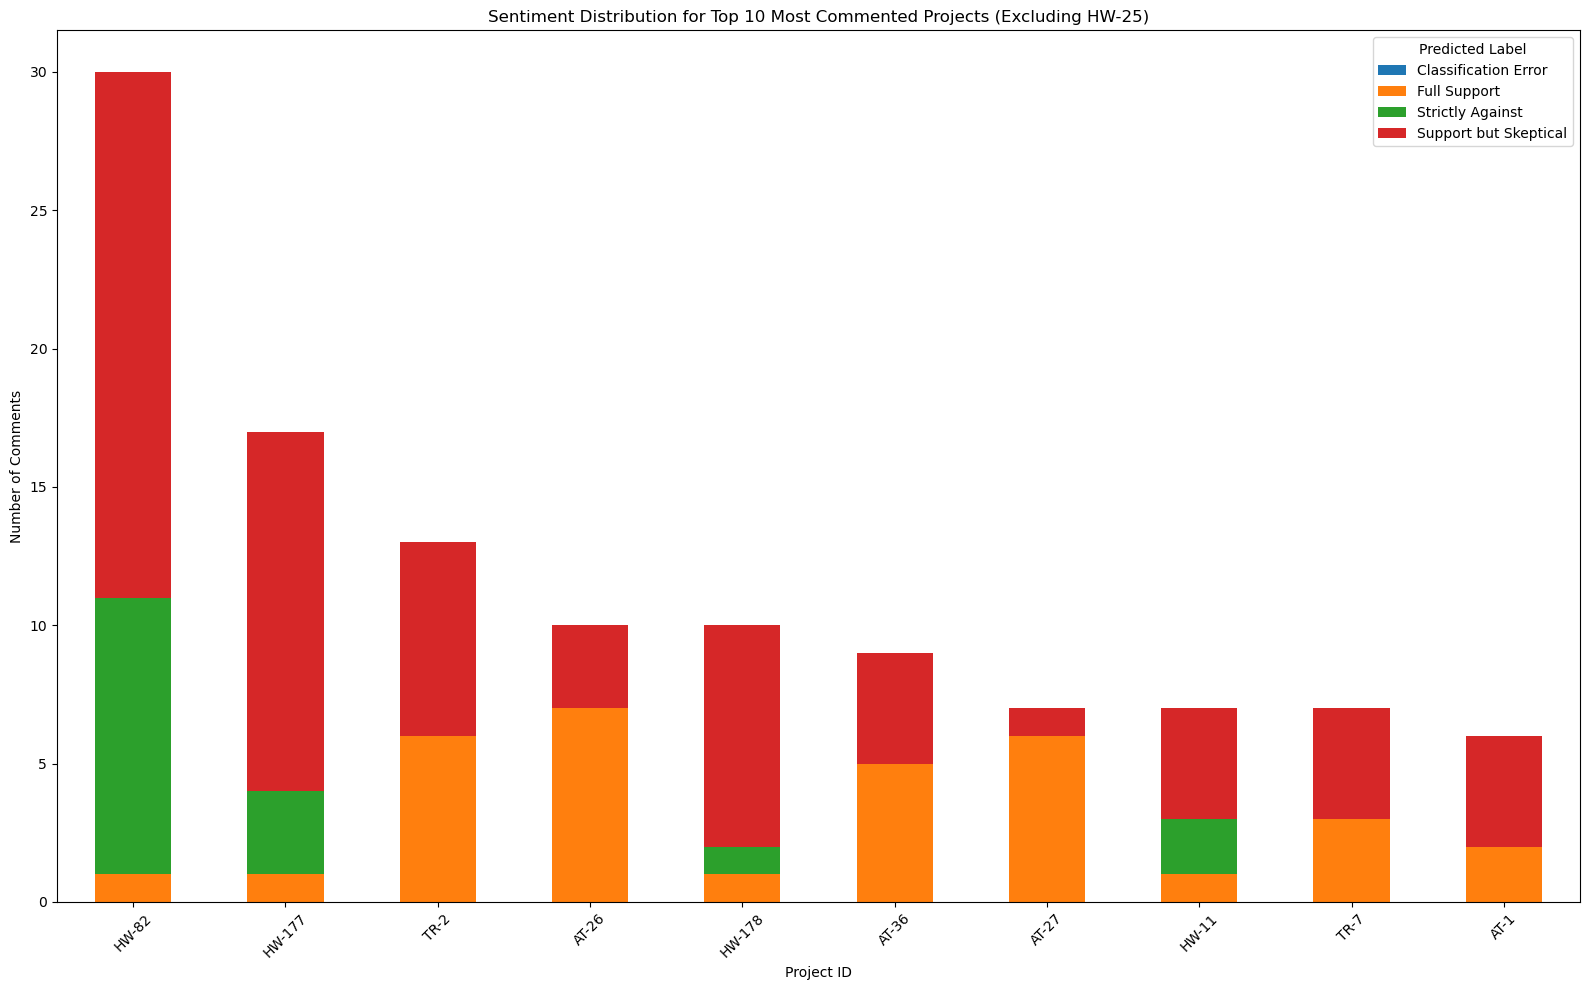

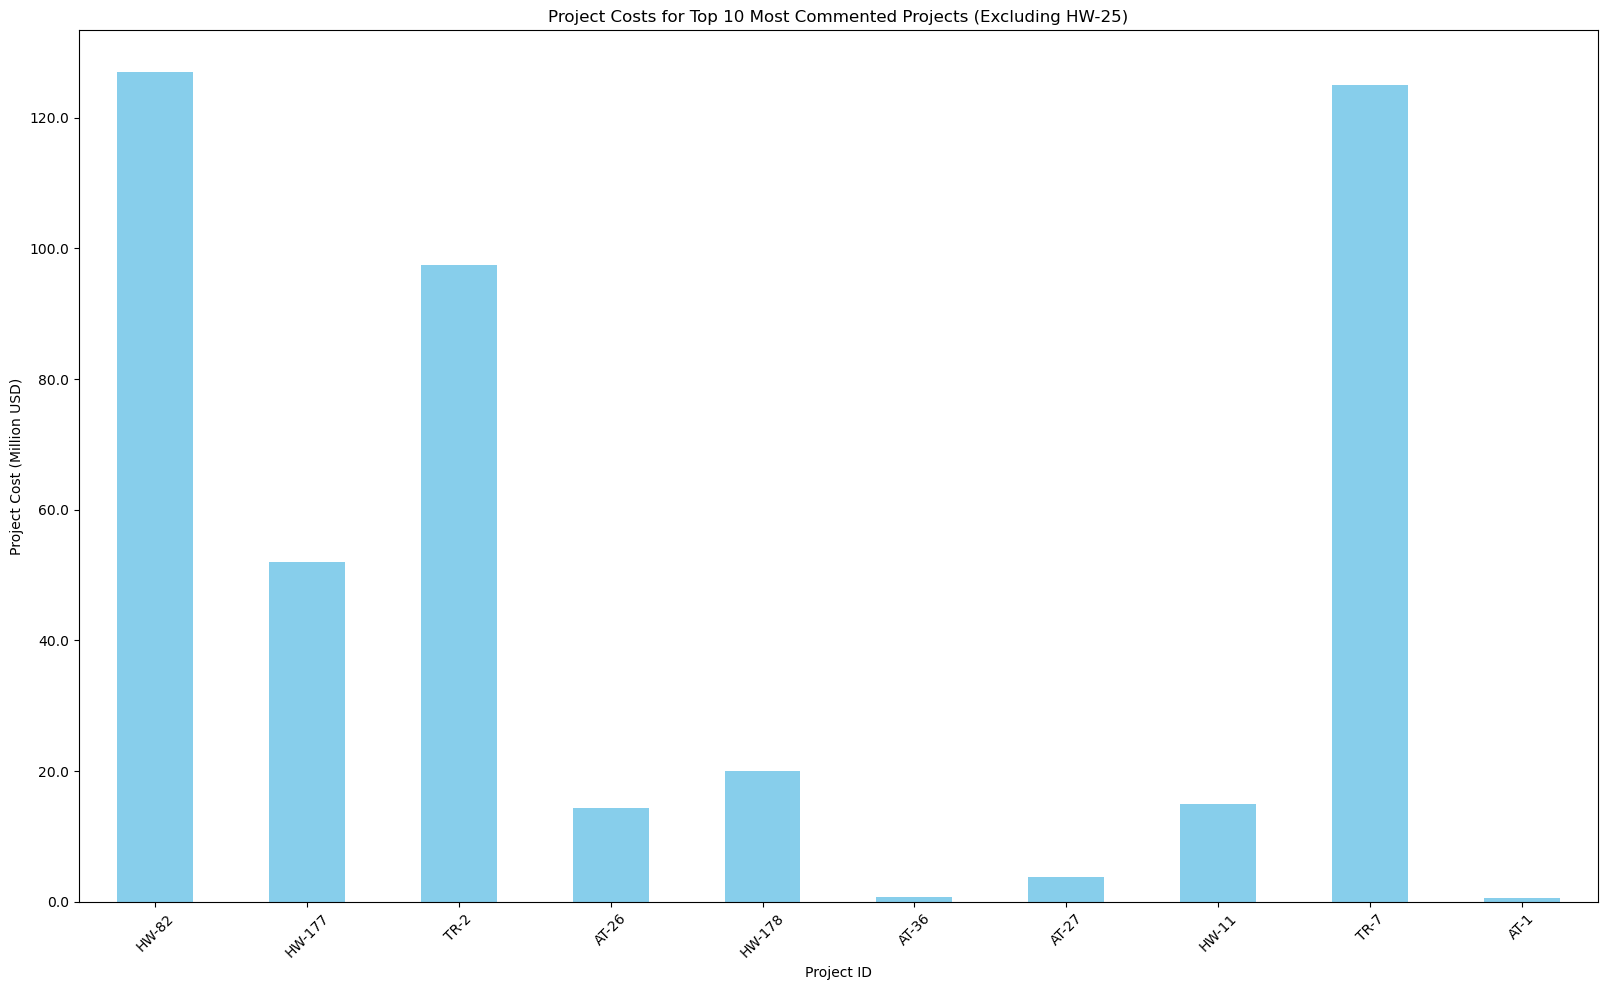

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Exclude 'HW-25' Since it is a big outlier
df = df[df['Project ID'] != 'HW-25']

# Clean data
df.dropna(inplace=True)
df['Project Cost'] = pd.to_numeric(df['Project Cost'].replace('[\$,]', '', regex=True), errors='coerce')
df.dropna(subset=['Project Cost'], inplace=True)

# Aggregate the count of comments (sentiments) per 'Project ID'
comment_counts = df.groupby('Project ID').size()

# Aggregate sentiment types per 'Project ID'
sentiment_counts = df.groupby(['Project ID', 'Predicted Label']).size().unstack(fill_value=0)

# Get unique costs associated with each 'Project ID'
unique_costs = df.groupby('Project ID')['Project Cost'].mean()  # Assuming consistent cost per project ID

# Identify top 10 projects based on total number of comments
top_projects_by_comments = comment_counts.nlargest(10).index

# Prepare data for visualization
top_comments_df = sentiment_counts.loc[top_projects_by_comments]
top_costs_df = unique_costs.loc[top_projects_by_comments]

# Visualization for sentiment counts of top 10 commented projects
plt.figure(figsize=(16, 10))
top_comments_df.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Sentiment Distribution for Top 10 Most Commented Projects (Excluding HW-25)')
plt.ylabel('Number of Comments')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.legend(title='Predicted Label')
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming this is the plotting part of your code
plt.figure(figsize=(16, 10))
top_costs_df.plot(kind='bar', color='skyblue', figsize=(16, 10))
plt.title('Project Costs for Top 10 Most Commented Projects (Excluding HW-25)')
plt.ylabel('Project Cost (Million USD)')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.tight_layout()

# Format the y-axis to display in millions
scale_factor = 1e6  # Factor to convert from dollars to millions
ticks_loc = plt.gca().get_yticks().tolist()
plt.gca().yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
plt.gca().set_yticklabels(['{:.1f}'.format(x / scale_factor) for x in ticks_loc])  # Convert to millions

plt.show()



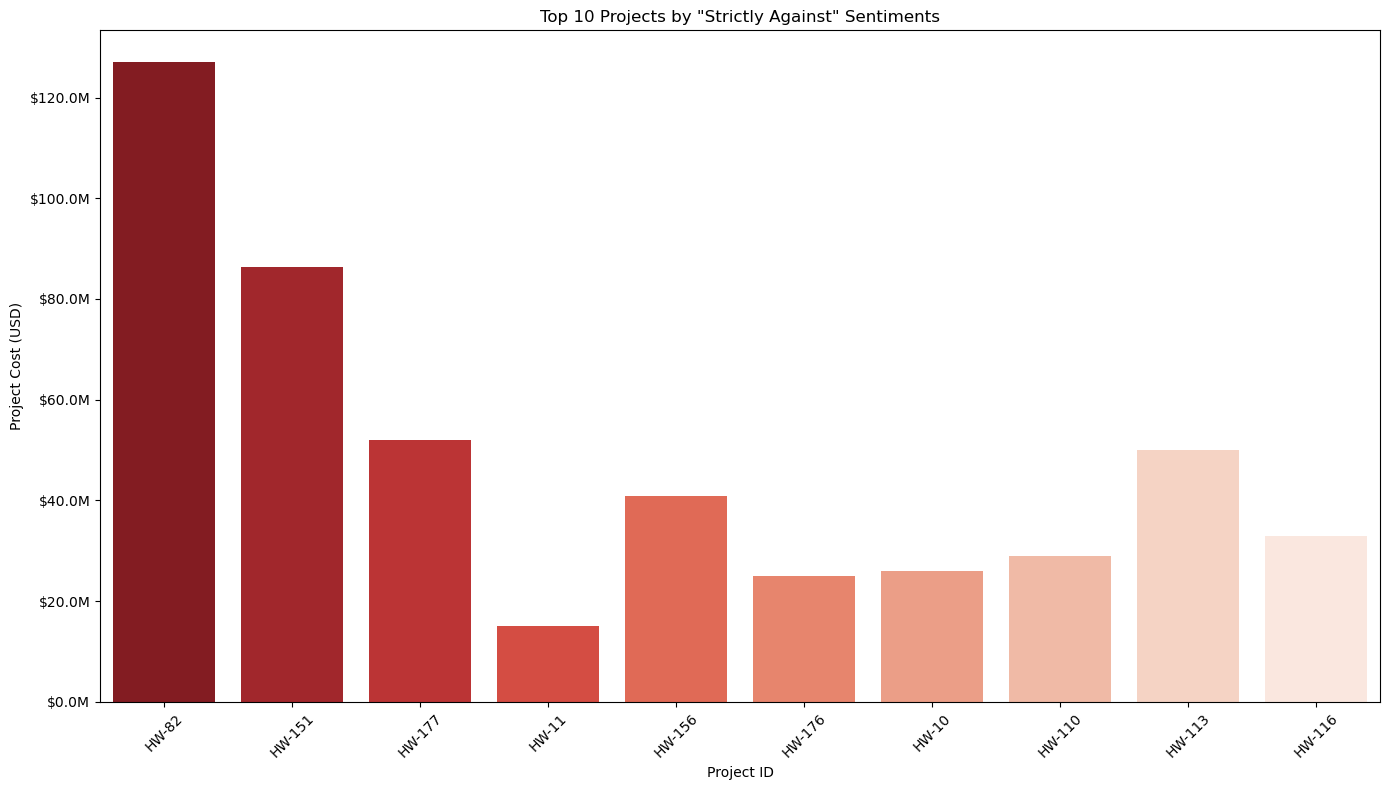

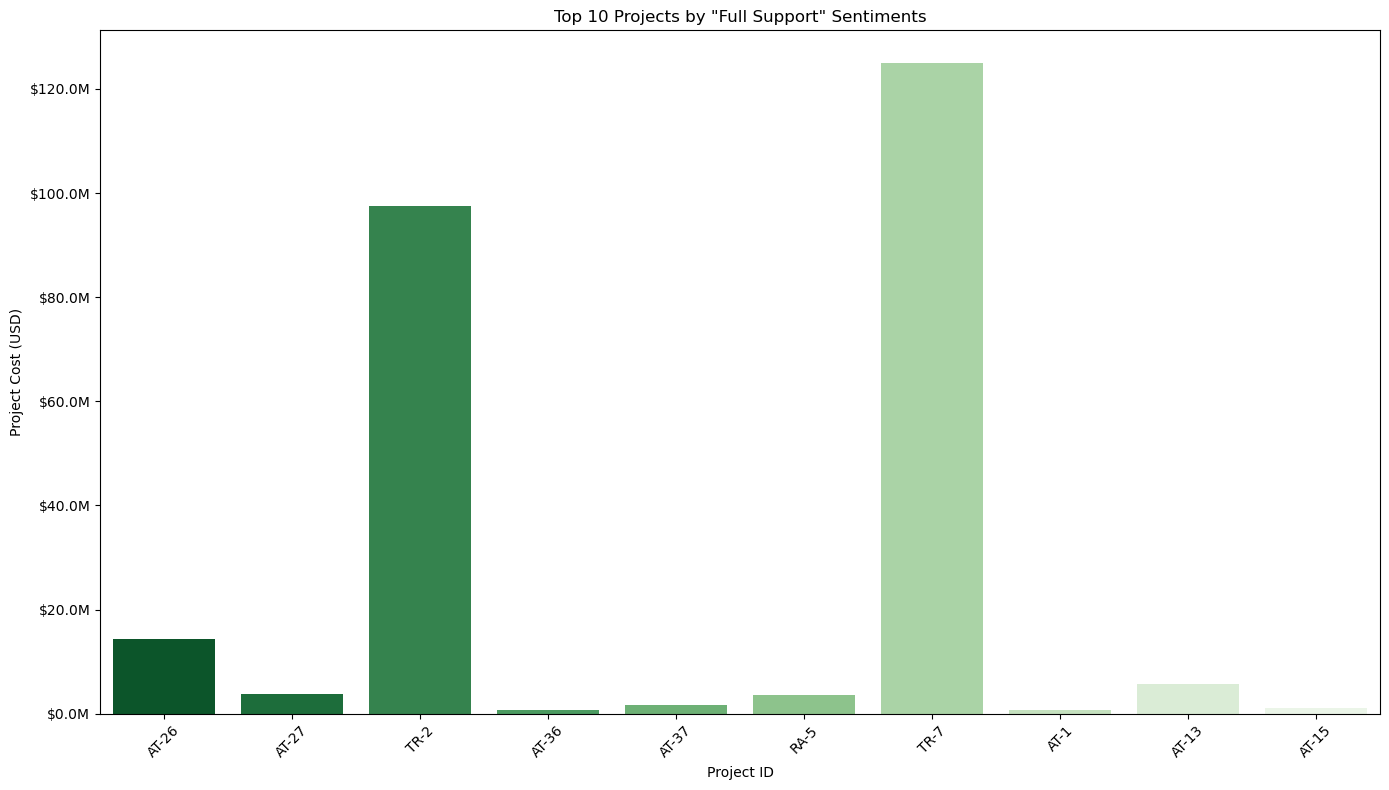

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Clean the data
df.dropna(inplace=True)
df['Project Cost'] = pd.to_numeric(df['Project Cost'].replace('[\$,]', '', regex=True), errors='coerce')
df.dropna(subset=['Project Cost'], inplace=True)

# Sentiment counts per 'Project ID'
sentiment_counts = df.groupby(['Project ID', 'Predicted Label']).size().unstack(fill_value=0)

# Aggregate total cost per 'Project ID'
project_costs = df.groupby('Project ID')['Project Cost'].mean()  # Assuming cost is consistent within each project

# Function to format y-axis in millions
def millions_formatter(x, pos):
    return '${:1.1f}M'.format(x*1e-6)

# Top 10 Projects for 'Strictly Against'
top_against = sentiment_counts['Strictly Against'].nlargest(10).index
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_against, y=project_costs[top_against], palette='Reds_r')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.title('Top 10 Projects by "Strictly Against" Sentiments')
plt.ylabel('Project Cost (USD)')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Projects for 'Full Support'
top_support = sentiment_counts['Full Support'].nlargest(10).index
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=top_support, y=project_costs[top_support], palette='Greens_r')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.title('Top 10 Projects by "Full Support" Sentiments')
plt.ylabel('Project Cost (USD)')
plt.xlabel('Project ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
